In [33]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
data = pd.read_excel('WHR2018Chapter2OnlineData.xls',sheet_name = 'Table2.1').drop(columns = ['Healthy life expectancy at birth','Negative affect','Democratic Quality','Delivery Quality','Confidence in national government','Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year','GINI index (World Bank estimate)','gini of household income reported in Gallup, by wp5-year','GINI index (World Bank estimate), average 2000-15']).dropna()
data.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect
0,Afghanistan,2008,3.723590,7.168690,0.450662,0.718114,0.181819,0.881686,0.517637
1,Afghanistan,2009,4.401778,7.333790,0.552308,0.678896,0.203614,0.850035,0.583926
2,Afghanistan,2010,4.758381,7.386629,0.539075,0.600127,0.137630,0.706766,0.618265
3,Afghanistan,2011,3.831719,7.415019,0.521104,0.495901,0.175329,0.731109,0.611387
4,Afghanistan,2012,3.782938,7.517126,0.520637,0.530935,0.247159,0.775620,0.710385


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 1561
Data columns (total 9 columns):
country                         1391 non-null object
year                            1391 non-null int64
Life Ladder                     1391 non-null float64
Log GDP per capita              1391 non-null float64
Social support                  1391 non-null float64
Freedom to make life choices    1391 non-null float64
Generosity                      1391 non-null float64
Perceptions of corruption       1391 non-null float64
Positive affect                 1391 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 108.7+ KB


In [37]:
LL = pd.DataFrame(data['Life Ladder'])
GDP=pd.DataFrame(data['Log GDP per capita'])
SS=pd.DataFrame(data['Social support'])
#LE=pd.DataFrame(data['Healthy life expectancy at birth'])
F=pd.DataFrame(data['Freedom to make life choices'])
G=pd.DataFrame(data['Generosity'])
CO=pd.DataFrame(data['Perceptions of corruption'])
PA=pd.DataFrame(data['Positive affect'])
#NA=pd.DataFrame(data['Negative affect'])
#DQ=pd.DataFrame(data['Democratic Quality'])
#DeQ=pd.DataFrame(data['Delivery Quality'])

In [38]:
overall = pd.concat([LL, GDP, SS, F, G, CO, PA], axis = 1, join_axes = [LL.index])

In [39]:
y = LL
X = overall.drop(['Life Ladder'],axis = 1)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("X_Train Set :", X_train.shape)
print("X_Test Set  :", X_test.shape)
print("y_Train Set :", y_train.shape)
print("y_Test Set  :", y_test.shape)

X_Train Set : (1043, 6)
X_Test Set  : (348, 6)
y_Train Set : (1043, 1)
y_Test Set  : (348, 1)


In [41]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])


Intercept of Regression 	: b =  [-2.2277424]
Coefficients of Regression 	: a =  [[ 0.50641538  1.96491824  0.2570726   0.45452616 -0.56429825  2.29310388]]



,Predictors,Coefficients
0,Log GDP per capita,0.506415
1,Social support,1.964918
2,Freedom to make life choices,0.257073
3,Generosity,0.454526
4,Perceptions of corruption,-0.564298
5,Positive affect,2.293104


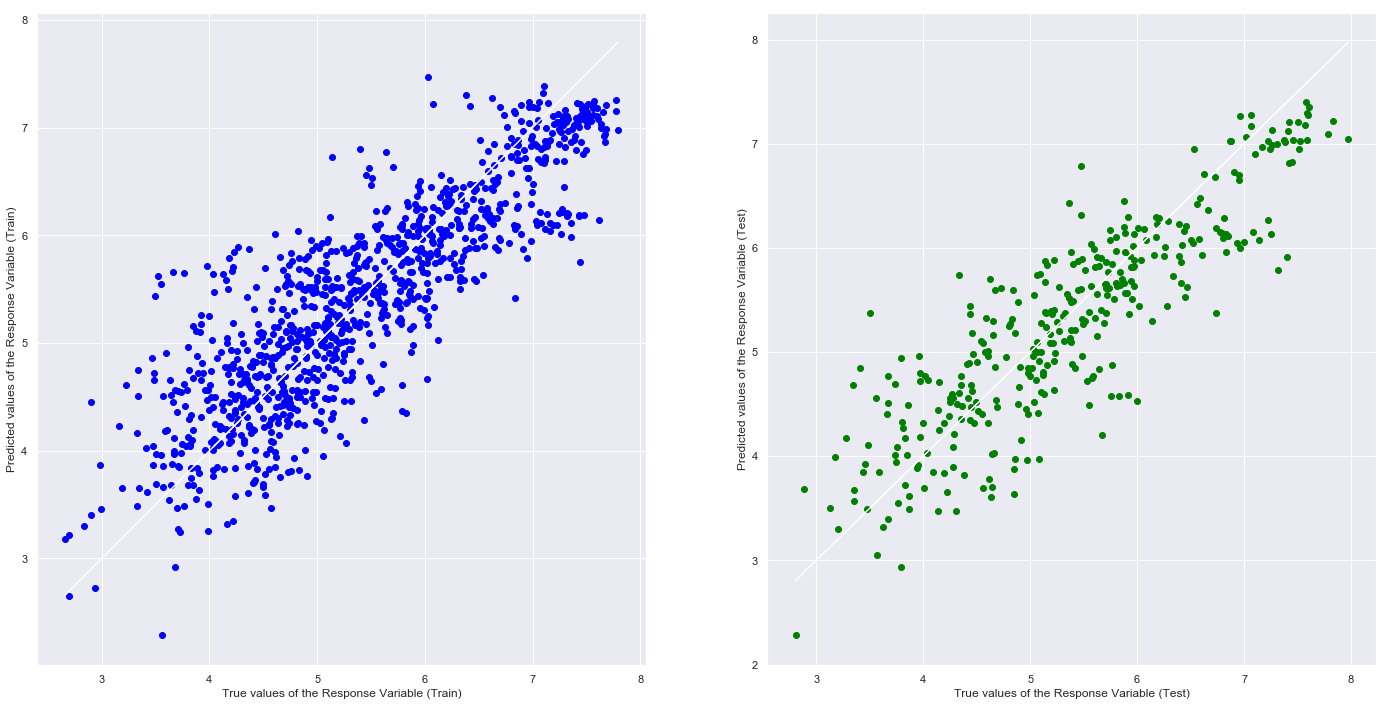

In [42]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7445449449897463
Mean Squared Error (MSE) 	: 0.32799274660630107

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7578206935383077
Mean Squared Error (MSE) 	: 0.30781850155292756

